<a href="https://colab.research.google.com/github/frank-895/machine_learning_journey/blob/main/collaborative_filtering/collaborative_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.collab import *
from fastai.tabular.all import *

# Collaborative Filtering - Movie Reviews

This textbook, based on the work [here](https://www.kaggle.com/code/jhoward/collaborative-filtering-deep-dive/notebook), is a deep dive into how collaborative filtering works. I will be using collaborative filtering to recommend movies based on the preferences of other users.

**So, what is collaborative filtering?**
Collaborative filtering is a method whereby a user's preferences are predicted based on the preferences of other users. It is underpinned by the assumption that people who agreed in the past will agree in the future.

The key foundational idea is **latent factors**. For example, Netflix don't need to ask you and keep a database of exactly which genres, film lengths, and time periods you like. Latent factors will be the parameters, unspecified in what they represent, used to compare the preferences of various users. We use the parameters to understand the likelihood that a person will like a product.

However, collaborative filtering isn't entirely for Netflix! There is a general class of problems collaborative filtering can solve and we generally refer to **items** which could be movies, links, diagnoses and many more...

Let's start by gathering some data  representing movie ratings from MovieLens dataset. Since this model is being used to inform my learning, rather than produce useful results, we will use a subset of the data for speed.

In [2]:
path = untar_data(URLs.ML_100k)

In [3]:
df = pd.read_csv(path/'u.data', # README specifies location of data
                 delimiter='\t', # README specifies tab separated file or TSV
                 header=None, # README specifies no labelled columns
                 names=['user', 'movie', 'rating', 'timestamp']) # we can add our own column names

In [4]:
df.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


It is useful to understand what this dataset  looks like cross-tabulated. Essentially, we want to fill the missing spots with predictions. These predictions will represent the predicted rating the user will give the movie, based on other users preferences. This could assist in making recommendations and assisting users to discover new content.

It's worth noting that the values we try to predict don't have to be ratings, it could even just be 1s and 0s, representing whether a user purchased a product.

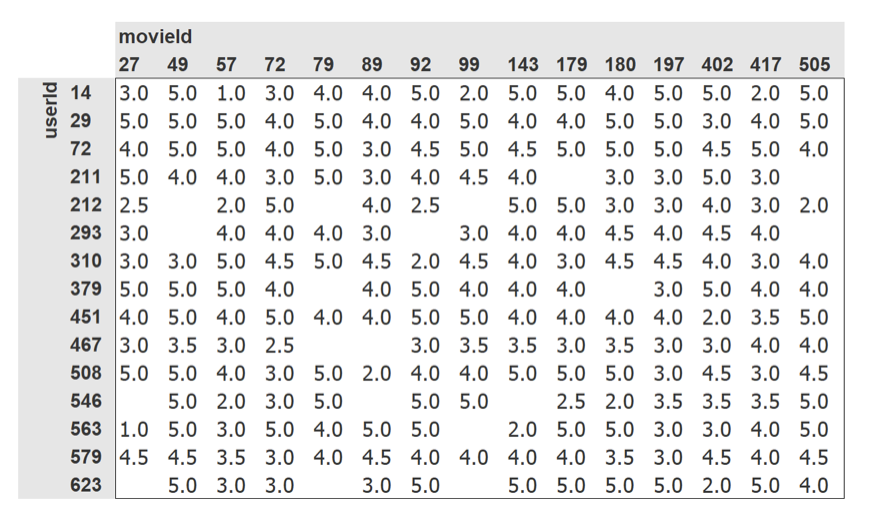